# Notebook to reproduce Fig 1d

In [1]:
import numpy as np
from shapely.geometry import box
from mbhl.simulation import Mask, Physics, System, Circle, Rectangle, Square
from mbhl.simulation import nm, um
import matplotlib.pyplot as plt
import figurefirst as ff
from pathlib import Path

In [2]:
%mkdir -p subfigs-Fig1-c

`plot_honeycomb` function renders the patterns formed by n-beam interference on a honeycomb lattice nanoaperture

In [3]:
def plot_honeycomb(
    ax,
    psi=5.0,
    diameter=50 * nm,
    diffusion=15 * nm,
    default_h=5 * nm,
    default_alpha=1.0,
    spacing_raw=300 * nm,
    drift=0 * nm,
    lim=(0.5 * um, 3.5 * um, 0.5 * um, 3.5 * um),
    gap=2.5 * um,
    cmap="viridis",
    alpha=1.0,
    h_ratio=1.0,
    n_pts=1,
    angle_offset=30,
    mask_only=False,
    show_mask=False,
):
    psi = np.deg2rad(psi)
    radius = diameter / 2
    H = gap

    trajectory = np.array(
        [(psi, theta) for theta in np.deg2rad(np.linspace(angle_offset + 0, angle_offset + 360, n_pts + 1))[:-1]]
    )
    phys = Physics(trajectory, diffusion=diffusion, drift=drift)
    W = spacing_raw + diameter
    pos = [Circle(0, 0, radius), Circle(W / 2, W / 2 * np.sqrt(3), radius), 
           Circle(W / 2, W / 6 * np.sqrt(3), radius), 
           Circle(W, W * 2 / 3 * np.sqrt(3), radius)]
    cell = (W, W * 3 ** 0.5)
    mask = Mask(
        pos,
        unit_cell=cell,
        repeat=(20, 10),
        pad=50 * nm,
        thickness=100 * nm,
        spacing=H,
    )
    system = System(mask=mask, physics=phys)
    if not mask_only:
        conv = system.simulate(h=default_h / h_ratio)
        ax.set_axis_off()
        system.draw(
            ax,
            mask_alpha=1.0,
            show_mask=show_mask,
            cmap=cmap,
            mask_lw=4,
            xlim=lim[:2],
            ylim=lim[2:],
            alpha=alpha,
        )
    else:
        mask.draw(ax, h=2.5 * nm, cmap="gray", vmax=None)
        ax.set_axis_off()
    return

1. Plot the honeycomb lattice offseted by 1 beam, showing the original nanoaperture positions

(1010, 1198)


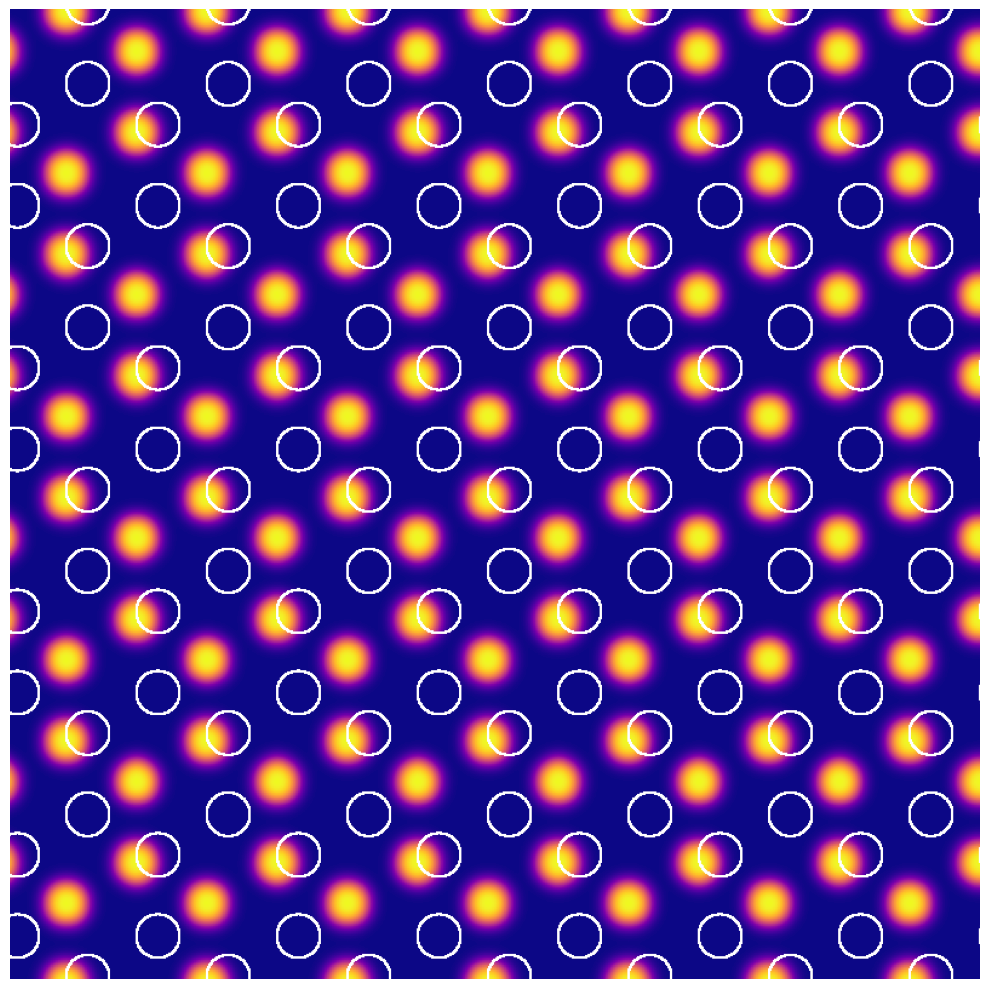

In [4]:
plt.figure(figsize=(10, 10))
pts = 1
plot_honeycomb(plt.gca(), n_pts=pts, cmap="plasma", 
               angle_offset=45, 
               diameter=90 * nm,
               psi=3,
               gap=2.5 * um,
               default_h=5 * nm, 
               lim=(1 * um, 3.0 * um, 1 * um, 3.0 * um),
               spacing_raw=200 * nm,
              show_mask=True)
plt.tight_layout()
plt.savefig(f"subfigs-Fig1-c/honeycomb-{pts}pt-with-stencil.png")

(1010, 1198)
(1010, 1198)
(1010, 1198)
(1010, 1198)
(1010, 1198)


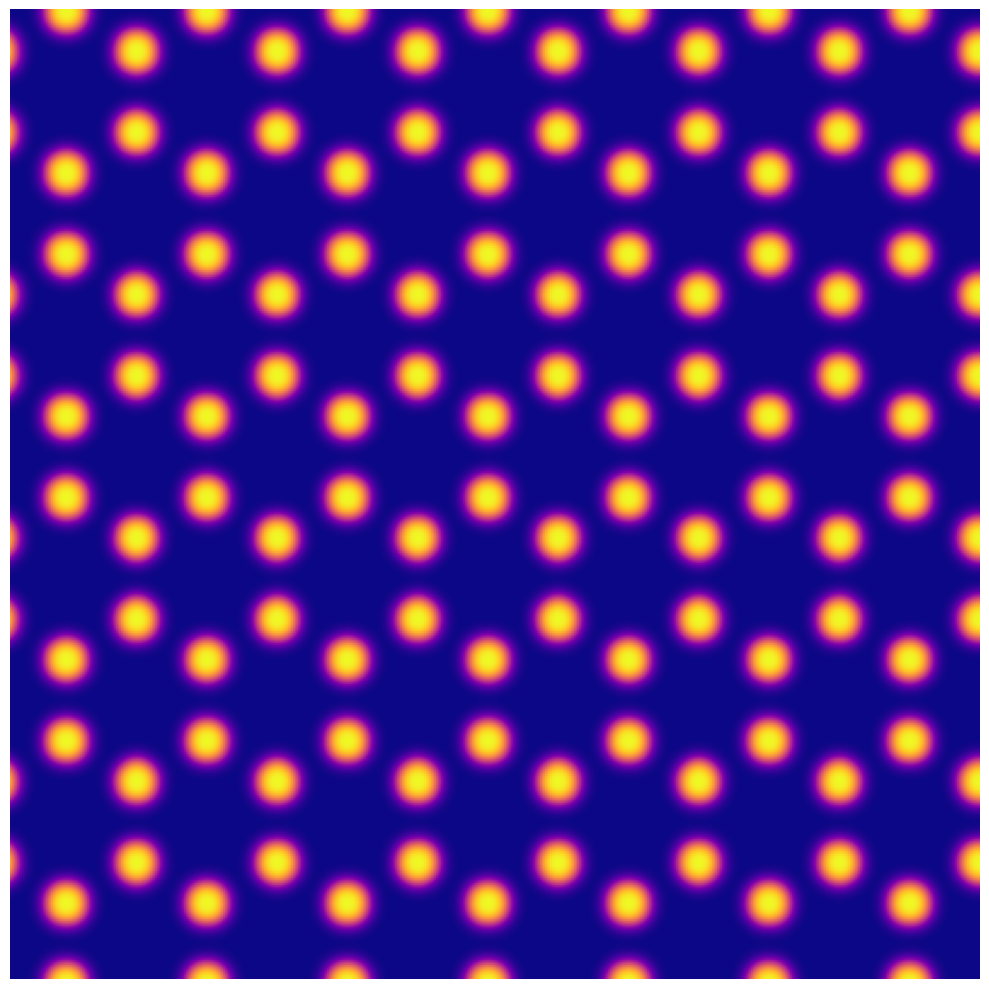

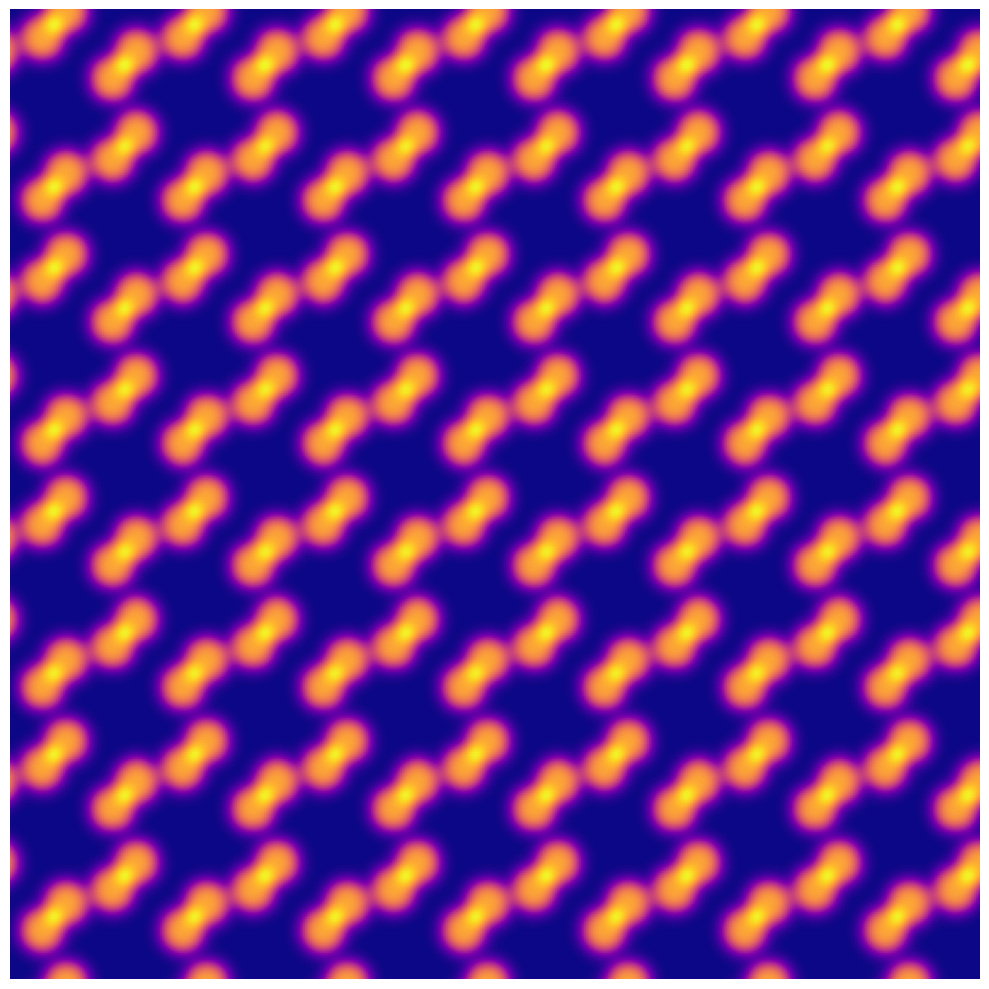

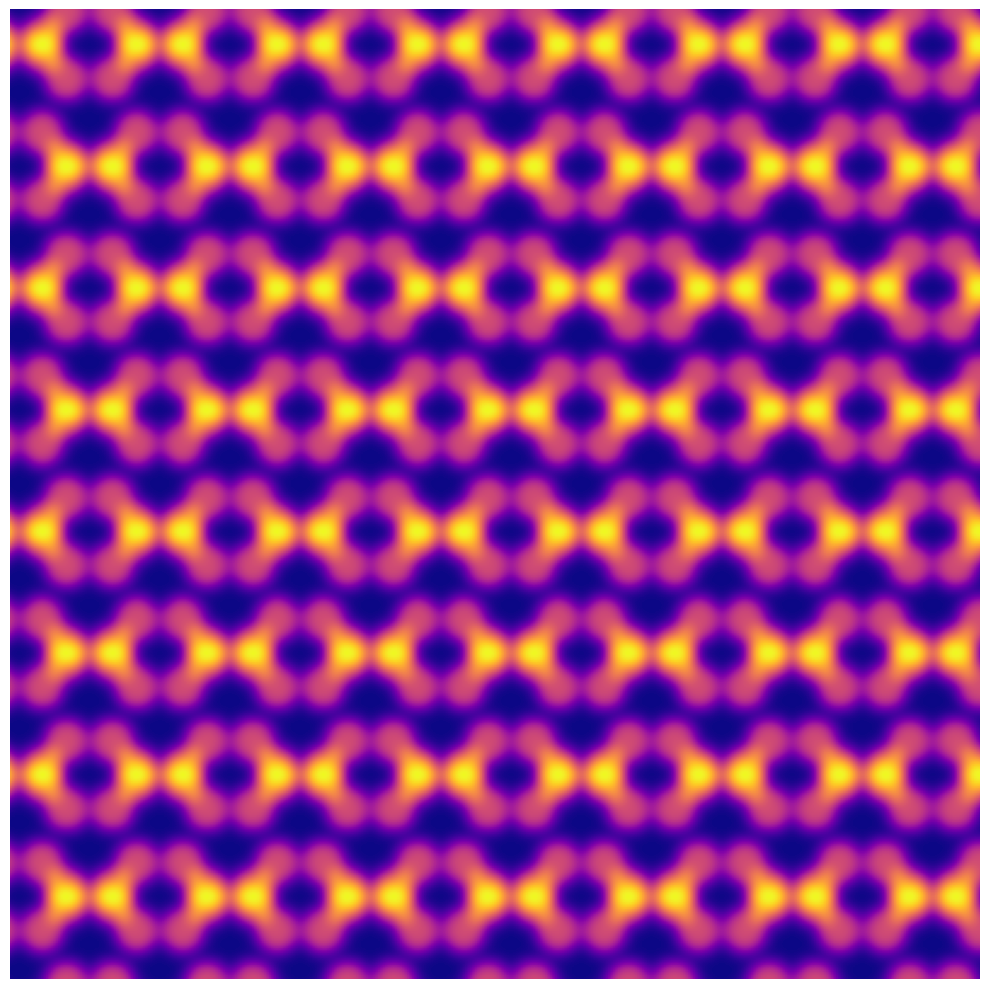

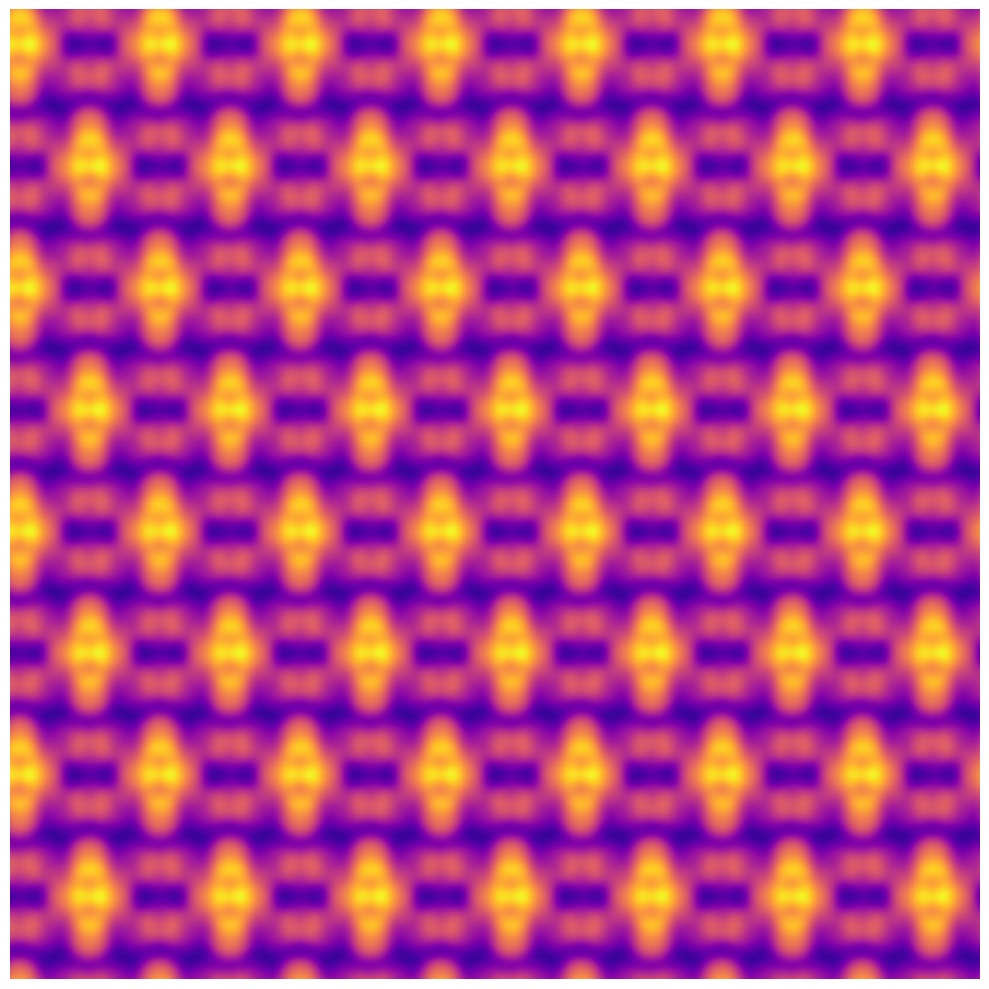

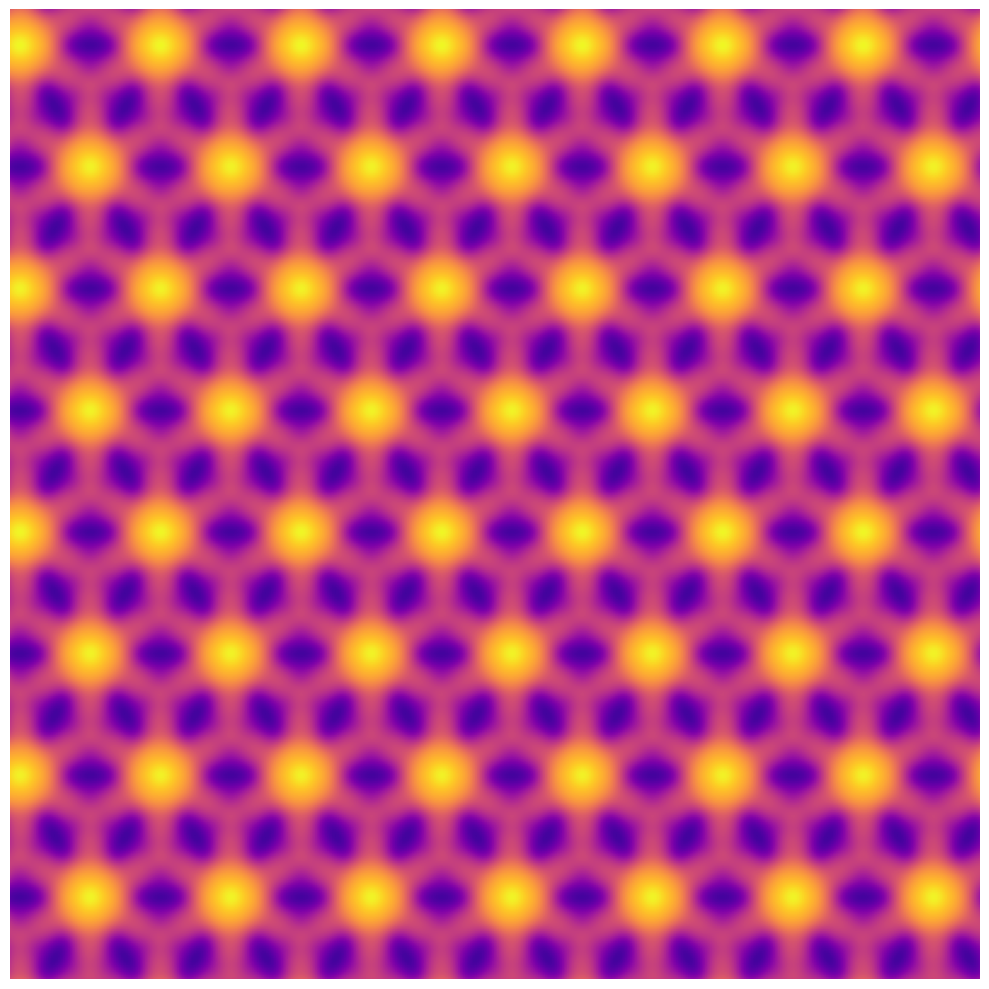

In [5]:
for pts in [1, 2, 4, 8, 360]:
    plt.figure(figsize=(10, 10))
    plot_honeycomb(plt.gca(), n_pts=pts, cmap="plasma", 
                   angle_offset=45, 
                   diameter=90 * nm,
                   psi=3,
                   gap=2.5 * um,
                   default_h=5 * nm, 
                   lim=(1 * um, 3.0 * um, 1 * um, 3.0 * um),
                   spacing_raw=200 * nm)
    plt.tight_layout()
    plt.savefig(f"subfigs-Fig1-c/honeycomb-{pts}pts.png")